# Import necessary libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data

In [11]:
data_path = "C:/Users/Nandan Hegde/OneDrive/Documents/GitHub/MSU_CMSE_830_Final_Semester_project/Movie_analysis_dashboard/Interim_Data/Final_Cleaned_Data.pkl"
data = pd.read_pickle(data_path)

In [12]:
# Data Cleaning: Ensure `release_year` is numeric
data = data[pd.to_numeric(data['release_year'], errors='coerce').notna()]
data['release_year'] = data['release_year'].astype(int)

# Display basic structure
print("Dataset Overview:")
print(data.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 3537 entries, 0 to 9378
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movieId            3537 non-null   int64  
 1   title              3537 non-null   object 
 2   genres_x           3537 non-null   object 
 3   avg_rating         3537 non-null   float64
 4   rating_count       3537 non-null   float64
 5   tags               3537 non-null   object 
 6   budget             3537 non-null   float64
 7   revenue            3537 non-null   float64
 8   runtime            3537 non-null   float64
 9   popularity         3537 non-null   float64
 10  vote_average       3537 non-null   float64
 11  vote_count         3537 non-null   float64
 12  release_year       3537 non-null   int32  
 13  cast               3537 non-null   object 
 14  crew               3537 non-null   object 
 15  original_language  3537 non-null   object 
 16  missing_bud

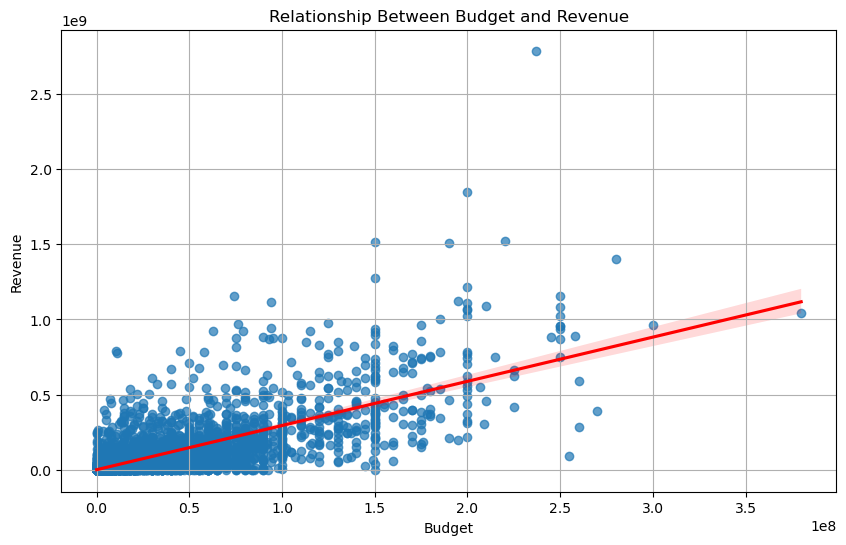

In [4]:
# Scatter plot: Budget vs. Revenue
plt.figure(figsize=(10, 6))
sns.regplot(x='budget', y='revenue', data=data, scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('Relationship Between Budget and Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid()
plt.show()

### Insights: Revenue vs. Budget
- This scatter plot shows the relationship between a movie's budget and its revenue.
- **Key Observations**:
  1. A positive correlation exists between budget and revenue.
  2. Some outliers indicate that not all high-budget movies perform well.
  3. Diminishing returns are visible for extremely high-budget movies.

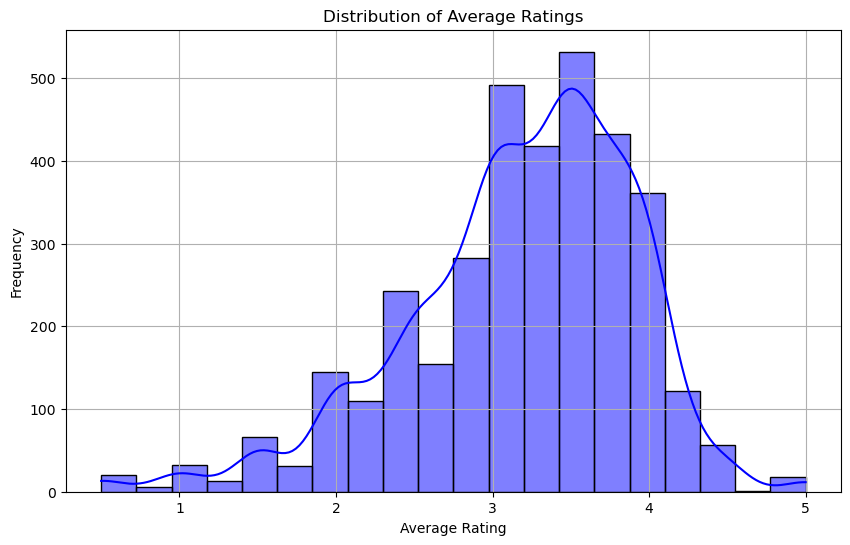

In [5]:
# Histogram: Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['avg_rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.grid()
plt.show()

### Insights: Distribution of Average Ratings
- The histogram shows the frequency distribution of movie ratings.
- **Key Observations**:
  1. Most movies have ratings between 6 and 8.
  2. A small number of movies are rated below 5 or above 9.
  3. The KDE curve suggests a slight skew toward higher ratings.

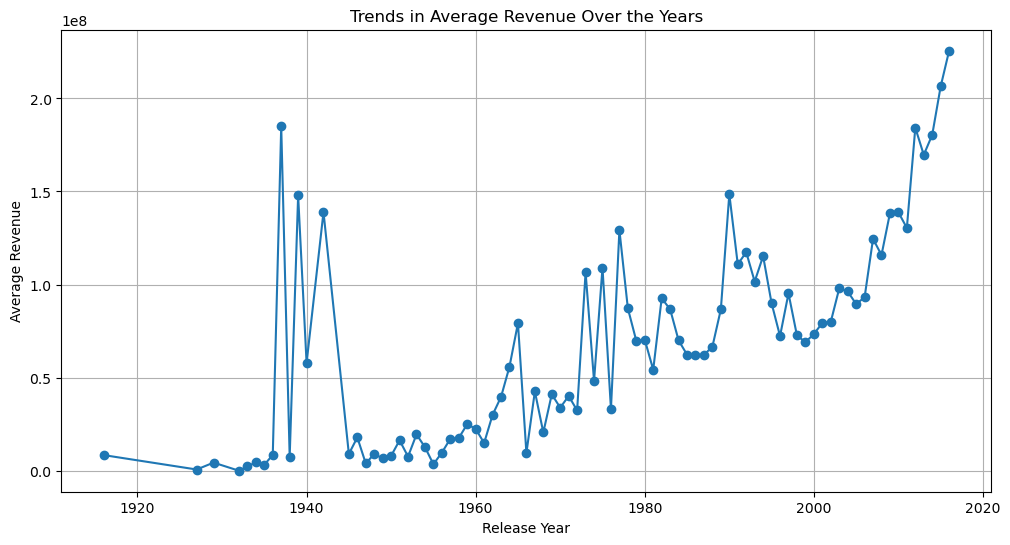

In [6]:
# Line plot: Trends in Revenue Over the Years
yearly_revenue = data.groupby('release_year')['revenue'].mean()
plt.figure(figsize=(12, 6))
plt.plot(yearly_revenue.index, yearly_revenue.values, marker='o')
plt.title('Trends in Average Revenue Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Revenue')
plt.grid()
plt.show()

### Insights: Trends in Revenue Over Time
- The line plot shows how average movie revenue has changed over the years.
- **Key Observations**:
  1. Movie revenues increased steadily from the early 2000s to the mid-2010s.
  2. There is a slight decline in average revenue in recent years, possibly due to changes in the industry (e.g., streaming services).

C:\Users\Nandan Hegde\AppData\Local\Temp\ipykernel_22336\2803155542.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


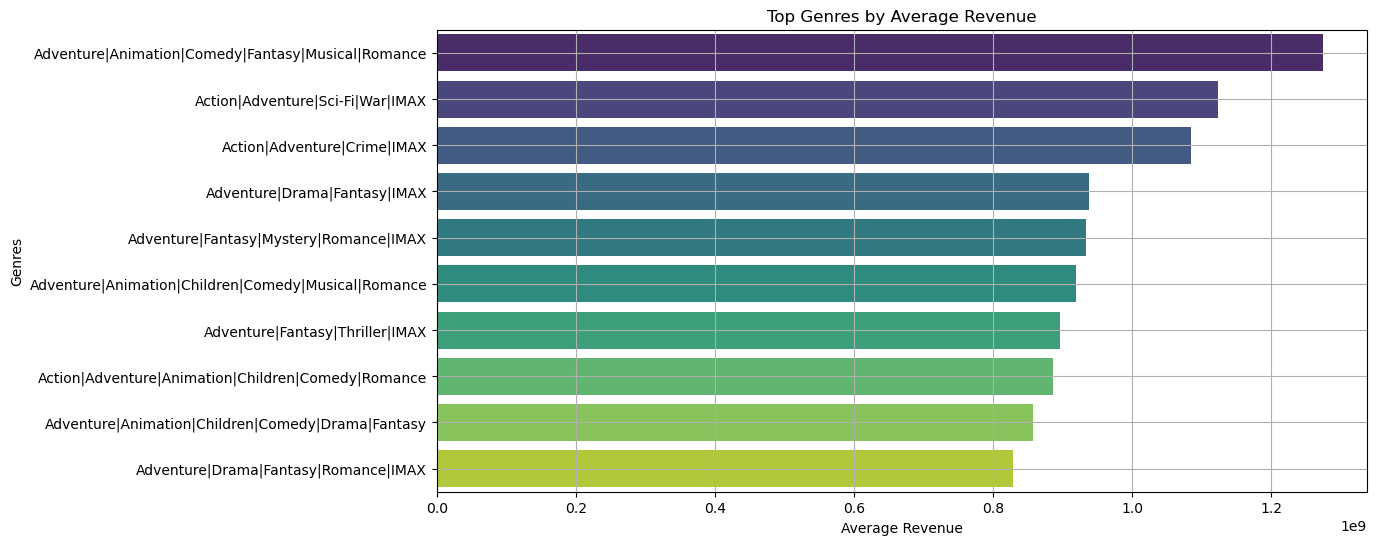

In [7]:
# Bar chart: Top genres by revenue
top_genres = data.groupby('genres_x')['revenue'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title('Top Genres by Average Revenue')
plt.xlabel('Average Revenue')
plt.ylabel('Genres')
plt.grid()
plt.show()

### Insights: Top Genres by Revenue
- This bar chart highlights the top-performing genres in terms of average revenue.
- **Key Observations**:
  1. Genres like "Adventure", "Action", and "Sci-Fi" dominate in terms of revenue.
  2. More niche genres, like "Documentary", tend to generate lower average revenue.

C:\Users\Nandan Hegde\AppData\Local\Temp\ipykernel_22336\2929679000.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_genre.values, y=profit_by_genre.index, palette="Blues_r")


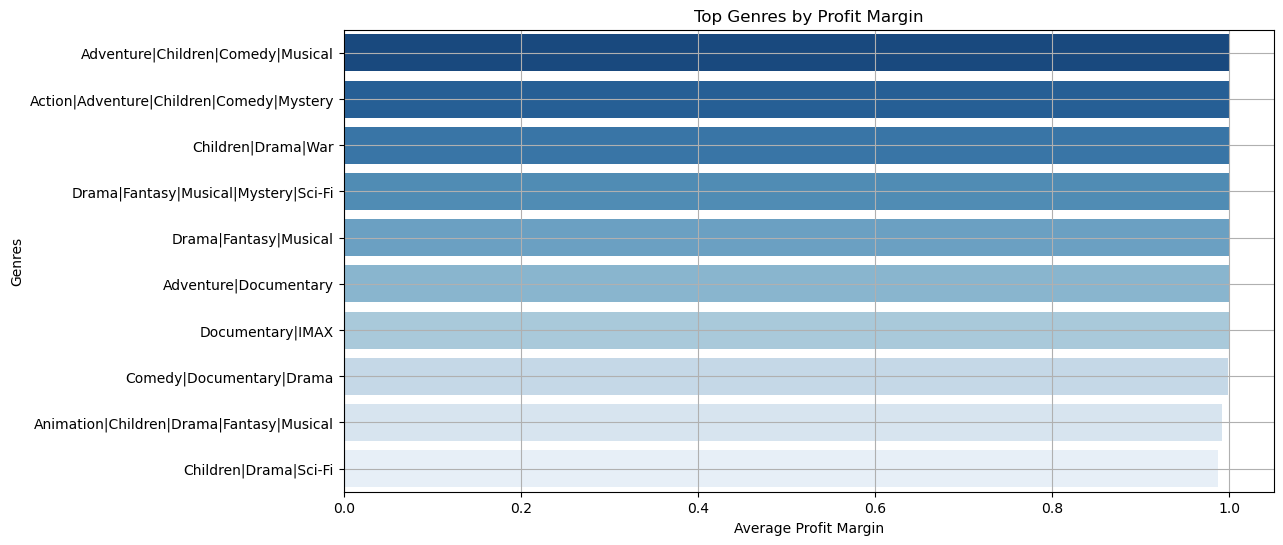

In [8]:
# Bar chart: Profit margin by genre
data['profit_margin'] = (data['revenue'] - data['budget']) / data['revenue']
profit_by_genre = data.groupby('genres_x')['profit_margin'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=profit_by_genre.values, y=profit_by_genre.index, palette="Blues_r")
plt.title('Top Genres by Profit Margin')
plt.xlabel('Average Profit Margin')
plt.ylabel('Genres')
plt.grid()
plt.show()

### Insights: Top Genres by Profit Margin
- This bar chart shows the genres with the highest average profit margins.
- **Key Observations**:
  1. Genres with combinations like **Adventure|Children|Comedy|Musical** have very high profit margins, indicating that these genres tend to have low budgets relative to their revenue.
  2. Other genre combinations like **Action|Adventure|Children|Comedy|Mystery** also show high profit margins.
  3. These observations suggest that multi-genre movies catering to family and children audiences often have a higher return on investment.